# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    print(city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

waitangi
morris
ribeira grande
talnakh
alotau
tanjung selor
alaghsas
constitucion
college
adamstown
rio grande
badger
alofi
tiksi
port alfred
avarua
puerto natales
puerto san jose
huaicheng
waitangi
georgetown
crane
tralee
port-aux-francais
grytviken
port-aux-francais
afaahiti
adamstown
grytviken
asau
taoudenni
al jawf
thompson
rio grande
stanley
ovalle
port-aux-francais
mata-utu
alofi
el porvenir
waingapu
atafu village
edinburgh of the seven seas
ushuaia
shippensburg
bredasdorp
port-aux-francais
margaret river
lospalos
teknaf
bosaso
felege neway
atafu village
punta arenas
isafjordur
nova vicosa
olonets
vilyuchinsk
avarua
wailua homesteads
acarau
vadso
fiambala
adamstown
bamako
conduaga
ilulissat
lihue
ascension
la'ie
bel ombre
albany
arraial do cabo
isafjordur
port mathurin
vingt cinq
yemetsk
port-aux-francais
torrington
iqaluit
port alfred
ilulissat
ust'-ilimsk
kone
san marcos
yellowknife
ancud
grytviken
georgiyevka
bilibino
ancud
pearsall
port-aux-francais
baker city
bonanza
northam

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=metric&appid={weather_api_key}"
    print(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?q=waitangi&units=metric&appid=cc0b97dbfbb5254bbcccf97212b4d1b1
Processing Record 1 of Set 1 | waitangi
http://api.openweathermap.org/data/2.5/weather?q=morris&units=metric&appid=cc0b97dbfbb5254bbcccf97212b4d1b1
Processing Record 2 of Set 1 | morris
http://api.openweathermap.org/data/2.5/weather?q=ribeira grande&units=metric&appid=cc0b97dbfbb5254bbcccf97212b4d1b1
Processing Record 3 of Set 1 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?q=talnakh&units=metric&appid=cc0b97dbfbb5254bbcccf97212b4d1b1
Processing Record 4 of Set 1 | talnakh
http://api.openweathermap.org/data/2.5/weather?q=alotau&units=metric&appid=cc0b97dbfbb5254bbcccf97212b4d1b1
Processing Record 5 of Set 1 | alotau
http://api.openweathermap.org/data/2.5/weather?q=tanjung selor&units=metric&appid=cc0b97dbfbb5254bbcccf97212b4d1b1
Processing Record 6 of Set 1 | tanjung selor
http://api.openweathermap.or

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,12.12,98,100,2.68,NZ,1724967823
1,morris,40.8334,-74.5329,23.10,79,100,3.60,US,1724967782
2,ribeira grande,38.5167,-28.7000,24.32,69,20,2.57,PT,1724967894
3,talnakh,69.4865,88.3972,11.77,87,100,2.05,RU,1724967895
4,alotau,-10.3069,150.4462,25.89,77,66,2.26,PG,1724967896


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.12,98,100,2.68,NZ,1724967823
1,morris,40.8334,-74.5329,23.10,79,100,3.60,US,1724967782
2,ribeira grande,38.5167,-28.7000,24.32,69,20,2.57,PT,1724967894
3,talnakh,69.4865,88.3972,11.77,87,100,2.05,RU,1724967895
4,alotau,-10.3069,150.4462,25.89,77,66,2.26,PG,1724967896


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

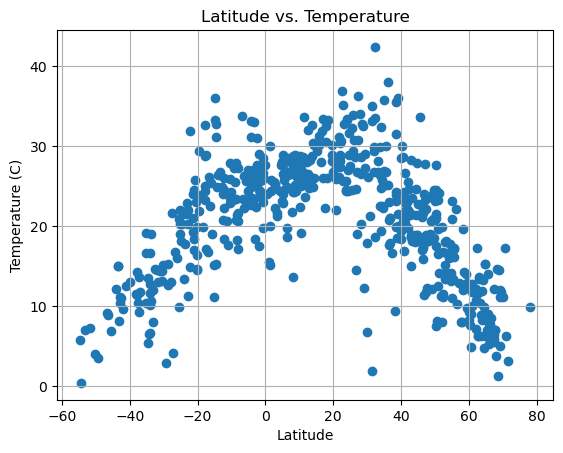

In [74]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])


# Incorporate the other graph properties
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.grid()


# Save the figure
plt.savefig("output_data/HWFig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

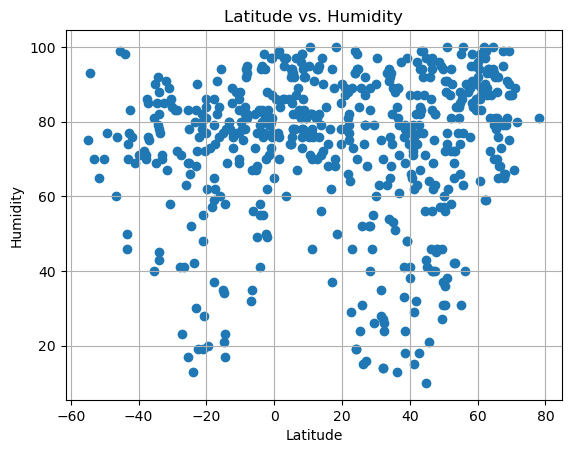

In [76]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

# Save the figure
plt.savefig("output_data/HWFig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

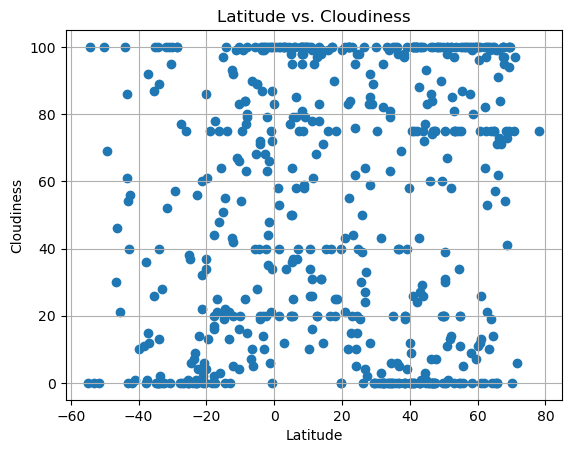

In [77]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

# Save the figure
plt.savefig("output_data/HWFig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

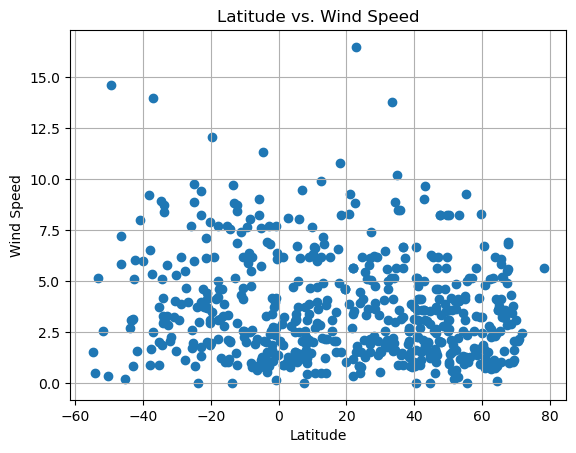

In [78]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

# Save the figure
plt.savefig("output_data/HWFig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, title, x_label, y_label):
    # Reshape the data for the linear regression model
    x_values = x
    y_values = y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.title(title)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
    # Show the plot
    print(f"The r^2-value is:{rvalue**2}")
    plt.show()

In [65]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,morris,40.8334,-74.5329,23.10,79,100,3.60,US,1724967782
2,ribeira grande,38.5167,-28.7000,24.32,69,20,2.57,PT,1724967894
3,talnakh,69.4865,88.3972,11.77,87,100,2.05,RU,1724967895
5,tanjung selor,2.8372,117.3642,22.24,95,100,0.99,ID,1724967897
6,alaghsas,17.0187,8.0168,33.41,37,100,3.46,NE,1724967898


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.12,98,100,2.68,NZ,1724967823
4,alotau,-10.3069,150.4462,25.89,77,66,2.26,PG,1724967896
7,constitucion,-35.3333,-72.4167,10.39,81,87,2.02,CL,1724967894
9,adamstown,-25.0660,-130.1015,19.07,69,38,6.00,PN,1724967901
10,rio grande,-32.0350,-52.0986,14.50,91,100,2.07,BR,1724967627


###  Temperature vs. Latitude Linear Regression Plot

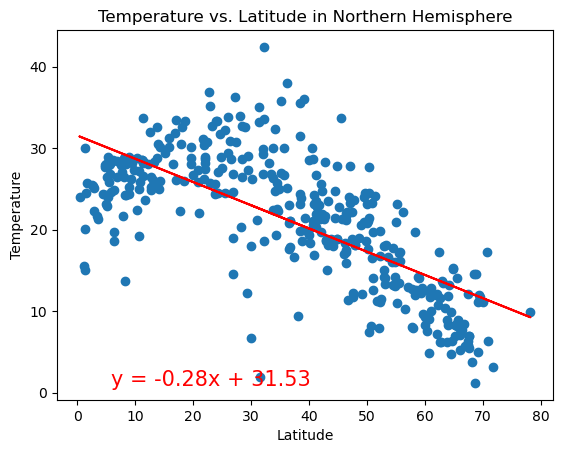

The r^2-value is:0.510930101122094


In [67]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 
                       'Temperature vs. Latitude in Northern Hemisphere', 'Latitude', 'Temperature')

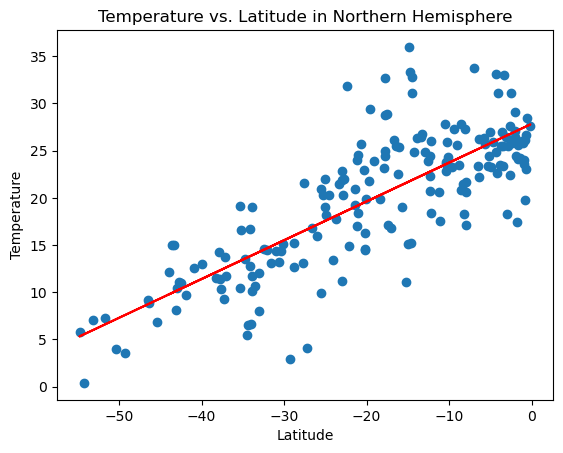

The r^2-value is:0.6267560042730621


In [68]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 
                       'Temperature vs. Latitude in Northern Hemisphere', 'Latitude', 'Temperature')

**Discussion about the linear relationship:** From what the graphs show, The closer to the equator you are, the Higher the Max Temnperature will be for that country. It is apparent for both graphs

### Humidity vs. Latitude Linear Regression Plot

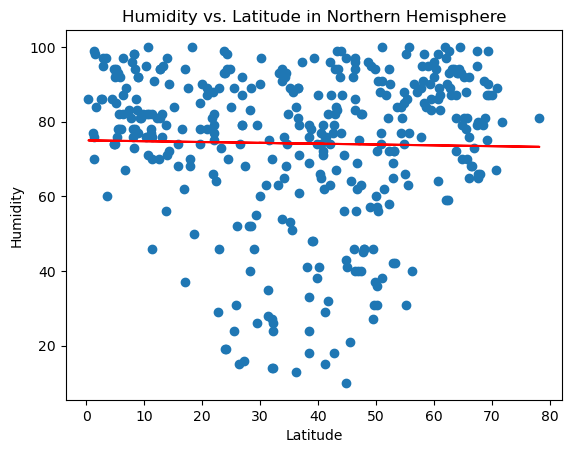

The r^2-value is:0.00045435972048023276


In [69]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 
                       'Humidity vs. Latitude in Northern Hemisphere', 'Latitude', 'Humidity')

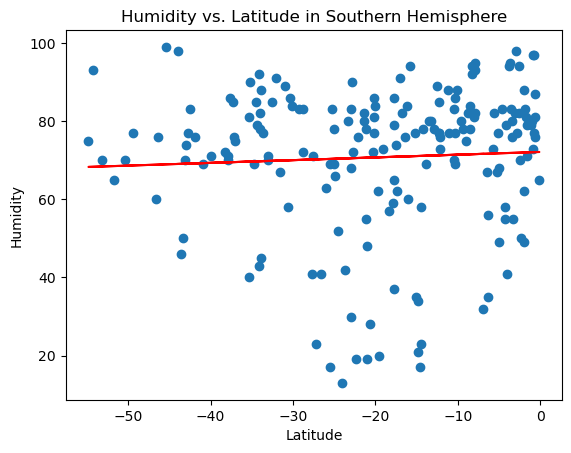

The r^2-value is:0.0027194748902576323


In [70]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 
                       'Humidity vs. Latitude in Southern Hemisphere', 'Latitude', 'Humidity')

**Discussion about the linear relationship:** From these graphs, while not by much, you do see a small trend of a drier weather as you get farther from the equator and as it does get more cold.

### Cloudiness vs. Latitude Linear Regression Plot

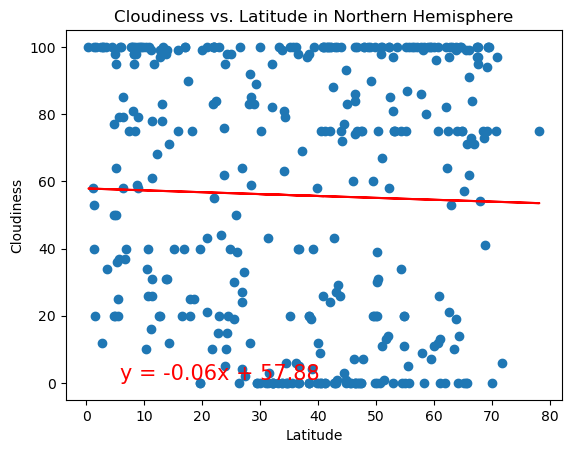

The r^2-value is:0.0008228080108775722


In [71]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 
                       'Cloudiness vs. Latitude in Northern Hemisphere', 'Latitude', 'Cloudiness')

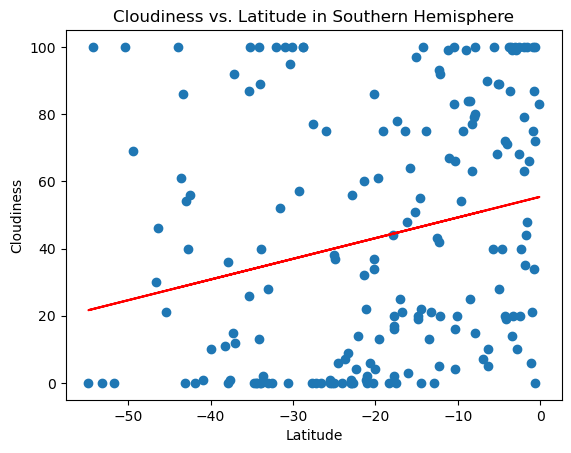

The r^2-value is:0.05450674516131611


In [72]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 
                       'Cloudiness vs. Latitude in Southern Hemisphere', 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** Clouds tend to be more prevalent in the equator. This is probably due to the higher humidity in the areas closer to the equator as show in previous plots.

### Wind Speed vs. Latitude Linear Regression Plot

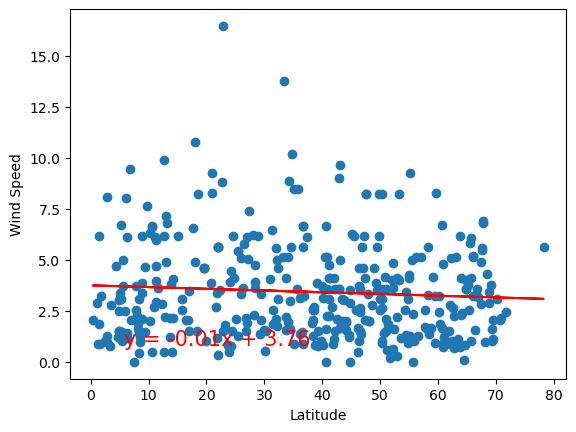

The r^2-value is:0.0051326643018425435


In [53]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 
                       'Wind Speed vs. Latitude in Northern Hemisphere', 'Latitude', 'Wind Speed')

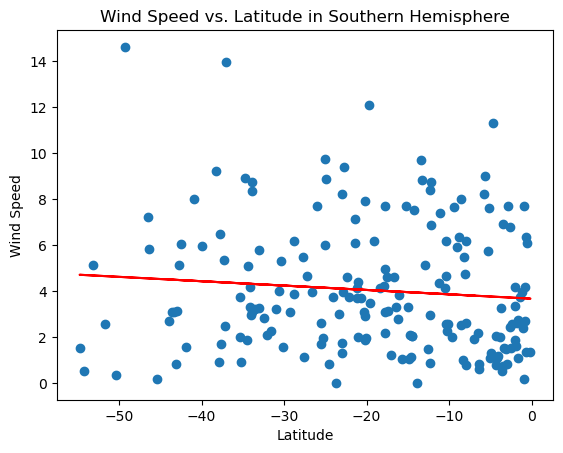

The r^2-value is:0.008977665775648177


In [73]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 
                       'Wind Speed vs. Latitude in Southern Hemisphere', 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** Here we have something interesting where the northern hemisphere gets faster wind speeds at the equator whereas the southern hemisphere gets slower the closer we get to the 